In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
data = pd.read_csv("Netflix.csv")

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.head(5)

# **Cleaning Data - Filling NaN**
1. Director  - unknown director
2. Cast - unknown cast
3. country - unknown country
4. date_added - Unknown
5. rating - NR
6. Duration - 0
7. Date_added - leaving as NaN only

In [126]:
data.dropna(axis = 1, how = "all",inplace=True)
data["director"].fillna("unknown_director",inplace=True)
data["country"].fillna("unknown_country",inplace = True)
data["cast"].fillna("unknown_cast",inplace = True)
data["rating"].fillna("NR",inplace = True)
data["duration"].fillna("0 time",inplace=True)

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# **Cleaning Data - Unesting Columns**
1. Country
2. Cast
3. Listed_in

I just splitting them into Lists, will use explode later whenever needed






In [128]:
data["country"]=data["country"].str.split(", ")
data["cast"]=data["cast"].str.split(", ")
data["listed_in"]=data["listed_in"].str.split(", ")

In [ ]:
data.info()

# **Changing "Rating Columns" from cateogorical to Numerical :**

*   1 --> Very Child Friendly
*   9 --> Stricly adult Content
*   10 -->Not Rated , NAN, other data like 74 min,84min,66min









In [ ]:
data["rating"].value_counts()

In [130]:
data["rating"]=data["rating"].replace(["TV-Y","TV-Y7","TV-Y7-FV","TV-G","G","TV-PG","PG","PG-13","TV-14","R","TV-MA","NC-17","NR","UR","74 min","84 min","66 min"],[1,2,3,4,4,5,5,6,7,8,9,9,10,10,10,10,10])

In [131]:
data["rating"].value_counts()

9     3210
7     2160
5     1150
8      799
6      490
2      334
1      307
4      261
10      90
3        6
Name: rating, dtype: int64

In [ ]:
data.info()

# **Changing "Duration Columns" from Object to Int**

Ex:


*   TV Shows are given as seasons, so 2 Seasons --> 2
*   Movies are given as min, so 119 mins --> 119



In [132]:
data["duration"]=data["duration"].str.split(expand = True)[0]
data["duration"] = data["duration"].astype("int64")

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   int64 
 9   duration      8807 non-null   int64 
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(3), object(9)
memory usage: 825.8+ KB


# **Changing Column "Date_added" Dtype to datetime**

In [134]:
data["date_added"]=data["date_added"].astype("datetime64")

# **Changing Column "release_year" Dtype to datetime**

*   As Only Year given in release_year , Assuming release happend at **1st Jan of Every Year**



In [135]:
data["release_year"]=pd.to_datetime(data["release_year"],format = "%Y")

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   datetime64[ns]
 8   rating        8807 non-null   int64         
 9   duration      8807 non-null   int64         
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 825.8+ KB


# **Statistical Analysis of Cleaned Data**

In [ ]:
data.describe()

In [ ]:
data.describe(include=object)

In [ ]:
data.describe(datetime_is_numeric=True)

In [ ]:
data.info()

# Creating New & Using Unfiltered Data with DataFrame Name - "data2"

*   To avoid getting Unknown Values in Graphical & Non-Graphical Analysis




In [145]:
data2 = pd.read_csv("Netflix.csv")
data2["country"]=data2["country"].str.split(", ")
data2["cast"]=data2["cast"].str.split(", ")
data2["listed_in"]=data2["listed_in"].str.split(", ")
data2["rating"].fillna("NR",inplace = True)
data2["duration"].fillna("0 time",inplace=True)
data2["rating"]=data2["rating"].replace(["TV-Y","TV-Y7","TV-Y7-FV","TV-G","G","TV-PG","PG","PG-13","TV-14","R","TV-MA","NC-17","NR","UR","74 min","84 min","66 min"],[1,2,3,4,4,5,5,6,7,8,9,9,10,10,10,10,10])
data2["date_added"]=data2["date_added"].astype("datetime64")
data2["release_year"]=pd.to_datetime(data2["release_year"],format = "%Y")
data2["duration"]=data2["duration"].str.split(expand = True)[0]
data2["duration"] = data2["duration"].astype("int64")

In [146]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   datetime64[ns]
 8   rating        8807 non-null   int64         
 9   duration      8807 non-null   int64         
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 825.8+ KB


# **Categorical Variable - Graphical & Non-Graphical Analysis**

**Type - A Movie or TV Show**

In [ ]:
data["type"].value_counts()

In [ ]:
sns.countplot(data = data,x="type")
plt.title("Count of Movies/Shows")
plt.show()

Inference : Movies Qty is more than TV Shows Qty



---



---





**Director**

In [ ]:
data2["director"].value_counts()

In [ ]:
sns.countplot(data = data,x="director")
plt.title("Director Count")
plt.show()

In [ ]:
A =data2["director"].value_counts().reset_index()
sns.histplot(A["director"],bins=19)
plt.title("No of Director Vs movies/TV shows Directed")
plt.xlabel("No of Directors")
plt.ylabel("No of Movies/TV Shows")
plt.show()



*   Total Number of Directors in Netflix Platfrom = 4528
*   Maximum Shows Directed = 19
*   Minimum Shows Directed = 1
*   Almost 80% Directors have their show First time in Netflix

---



---



**Cast**

In [ ]:
data2.explode("cast")["cast"].value_counts()

In [ ]:
A=data2.explode("cast")["cast"].value_counts().reset_index()
plt.figure(figsize=(40,12))
sns.histplot(A["cast"],bins=39)
plt.title("No of Actors Vs Total Shows Acted",fontsize = 20)
plt.xticks(rotation=45,fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("No of Actors",fontsize = 20)
plt.ylabel("Total Shows Present in",fontsize = 20)
plt.show()

*   Total Number of Actors in Netflix Platfrom = 39296
*   Maximum Shows Acted = 39
*   Minimum Shows Acted = 1
*   Almost 75% Actor have their Show for First time in Netflix

---



---



**Country**

In [89]:
data2.explode("country")["country"].value_counts()

United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
                  ... 
 Ecuador             1
Iran                 1
Cyprus               1
 Mongolia            1
 Montenegro          1
Name: country, Length: 197, dtype: int64

In [ ]:
A = data2.explode("country")["country"].value_counts().reset_index().iloc[:20]
plt.figure(figsize=(40,12))
sns.barplot(data=A,x="index",y="country")
plt.title("Country Vs Shows released",fontsize = 20)
plt.xticks(rotation=45,fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Country",fontsize = 20)
plt.ylabel("Total Shows relesed",fontsize = 20)
plt.show()

*   Netflix content avaiable in 197 Countries
*   Maximum Shows Released in United States

---



---





**Date_added**

In [ ]:
data["date_added"].dt.year.value_counts()

In [ ]:
#plt.figure(figsize=(12,8))
#A= data["date_added"].dt.year.value_counts().reset_index()
#sns.barplot(data=A,x="index",y="date_added")
sns.countplot(x=data["date_added"].dt.year)
plt.title("Show Addition year wise",fontsize = 12)
plt.xticks(rotation=45,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Year",fontsize = 12)
plt.ylabel("Total Shows added",fontsize = 12)
plt.show()



*   Netflix started shows addition from 2008 and adding content since then every year
*   Shows addition started to drastically increase from 2016 & Peaked in year 2019 with 2016 Nos shows added in single year

---



---





**Ratings**

Content Rating 1-->Very Child friendly, 9 --> Mature Audience Content


In [ ]:
data["rating"].value_counts()

In [ ]:
sns.countplot(x=data["rating"])

*   88% Shows Avaible are Either Matured Content or Where Parental Guidance is Needed
*   Content avaiable for children is very less

---



---








**Genres - Listed_in**

In [ ]:
data2.explode("listed_in")["listed_in"].value_counts()

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data = data2.explode("listed_in"),x="listed_in",order =data2.explode("listed_in")["listed_in"].value_counts().index)
plt.title("Genre wise Shows Available",fontsize = 12)
plt.xticks(rotation=45,fontsize = 8)
plt.yticks(fontsize = 12)
plt.xlabel("Genres",fontsize = 12)
plt.ylabel("Total Shows Avaiable",fontsize = 12)
plt.show()

*   There are total 73 Genres avaiable in Netflix

*   Major Content Avaiable in Genre -  "Internation Movies", next is "Dramas"


---



---



# **Comparison of TV Shows vs Movies**

**Creating Separate Dataframe for Movies & TV Shows for easy Analysis**
* Will use below "moviedata" & "tvshowdata" for Separate anlysis whereever needed

In [147]:
moviedata = data2[data2["type"] == "Movie"]
tvshowdata = data2[data2["type"] == "TV Show"]

In [ ]:
moviedata.info()
tvshowdata.info()

# **Country wise Content Comparison**

In [ ]:
moviecountry = moviedata.explode("country").groupby("country")["title"].count().sort_values(ascending=False).reset_index()
moviecountry

In [ ]:
tvshowcountry = tvshowdata.explode("country").groupby("country")["title"].count().sort_values(ascending=False).reset_index()
tvshowcountry

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.barplot(data= moviecountry.iloc[:10], x="country",y="title")
plt.title("Country wise Movies Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Countries",fontsize = 10)
plt.ylabel("Total Movies Available",fontsize = 10)
plt.subplot(1,2,2)
sns.barplot(data= tvshowcountry.iloc[:10], x="country",y="title")
plt.title("Country wise TV Show Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Countries",fontsize = 10)
plt.ylabel("Total TV Shows Avaiable",fontsize = 10)
plt.show()

In [ ]:
countrydata = data2.explode("country").groupby(["type","country"])["title"].count().sort_values(ascending=False).reset_index()
countrydata

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.barplot(data= countrydata[countrydata["type"] == "Movie"].sort_values("title",ascending = False).iloc[:10], x="country",y="title")
plt.title("Country wise Movies Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Countries",fontsize = 10)
plt.ylabel("Total Movies Available",fontsize = 10)
plt.subplot(1,2,2)
sns.barplot(data= countrydata[countrydata["type"] == "TV Show"].sort_values("title",ascending = False).iloc[:10], x="country",y="title")
plt.title("Country wise TV Show Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Countries",fontsize = 10)
plt.ylabel("Total TV Shows Avaiable",fontsize = 10)
plt.show()


*   Netflix Movie Content is avaiable in more countries than its TV Shows
*   Movie Content in avaiable in 122 Countries
*   TV Show Content is avaiable in 66 countries only
*   United States has highest content of Movies and TV Shows in Netflix Platform





# **Best Time to launch Analysis**

In [151]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6131 non-null   object        
 1   type          6131 non-null   object        
 2   title         6131 non-null   object        
 3   director      5943 non-null   object        
 4   cast          5656 non-null   object        
 5   country       5691 non-null   object        
 6   date_added    6131 non-null   datetime64[ns]
 7   release_year  6131 non-null   datetime64[ns]
 8   rating        6131 non-null   int64         
 9   duration      6131 non-null   int64         
 10  listed_in     6131 non-null   object        
 11  description   6131 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 622.7+ KB


In [ ]:
weekday = data2.groupby([data2["date_added"].dt.day_name(),"type"])["title"].count().reset_index().sort_values("title",ascending = False)
weekday

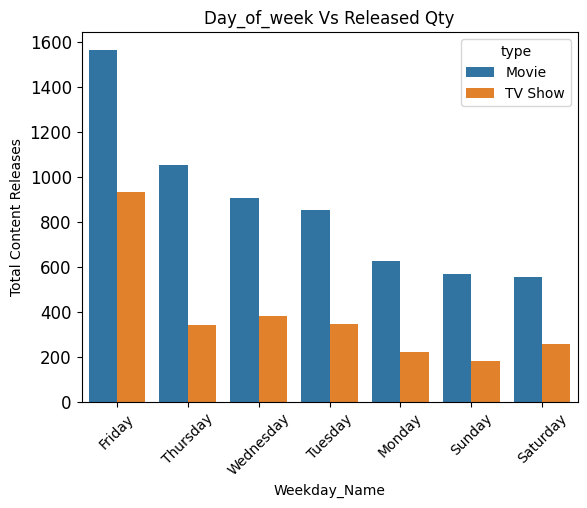

In [178]:
sns.barplot(data =weekday ,x ="date_added",y= "title", hue="type" )
plt.title("Day_of_week Vs Released Qty",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Weekday_Name",fontsize = 10)
plt.ylabel("Total Content Releases",fontsize = 10)
plt.show()

In [179]:
week = data2.groupby([data2["date_added"].dt.week,"type"])["title"].count().reset_index().sort_values("title",ascending = False)
week

<ipython-input-179-e04e4ef922dd>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week = data2.groupby([data2["date_added"].dt.week,"type"])["title"].count().reset_index().sort_values("title",ascending = False)


,date_added,type,title
0,1.0,Movie,316
86,44.0,Movie,243
78,40.0,Movie,215
16,9.0,Movie,207
50,26.0,Movie,195
...,...,...,...
5,3.0,TV Show,32
7,4.0,TV Show,32
3,2.0,TV Show,30
19,10.0,TV Show,28


In [ ]:
plt.figure(figsize = (20,8))
sns.barplot(data =week ,x ="date_added",y= "title", hue="type" )
plt.title("Week# Vs Released Qty",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Week",fontsize = 10)
plt.ylabel("Total Content Releases",fontsize = 10)
plt.show()

In [ ]:
month = data2.groupby([data2["date_added"].dt.month_name(),"type"])["title"].count().reset_index().sort_values("title",ascending = False)
month

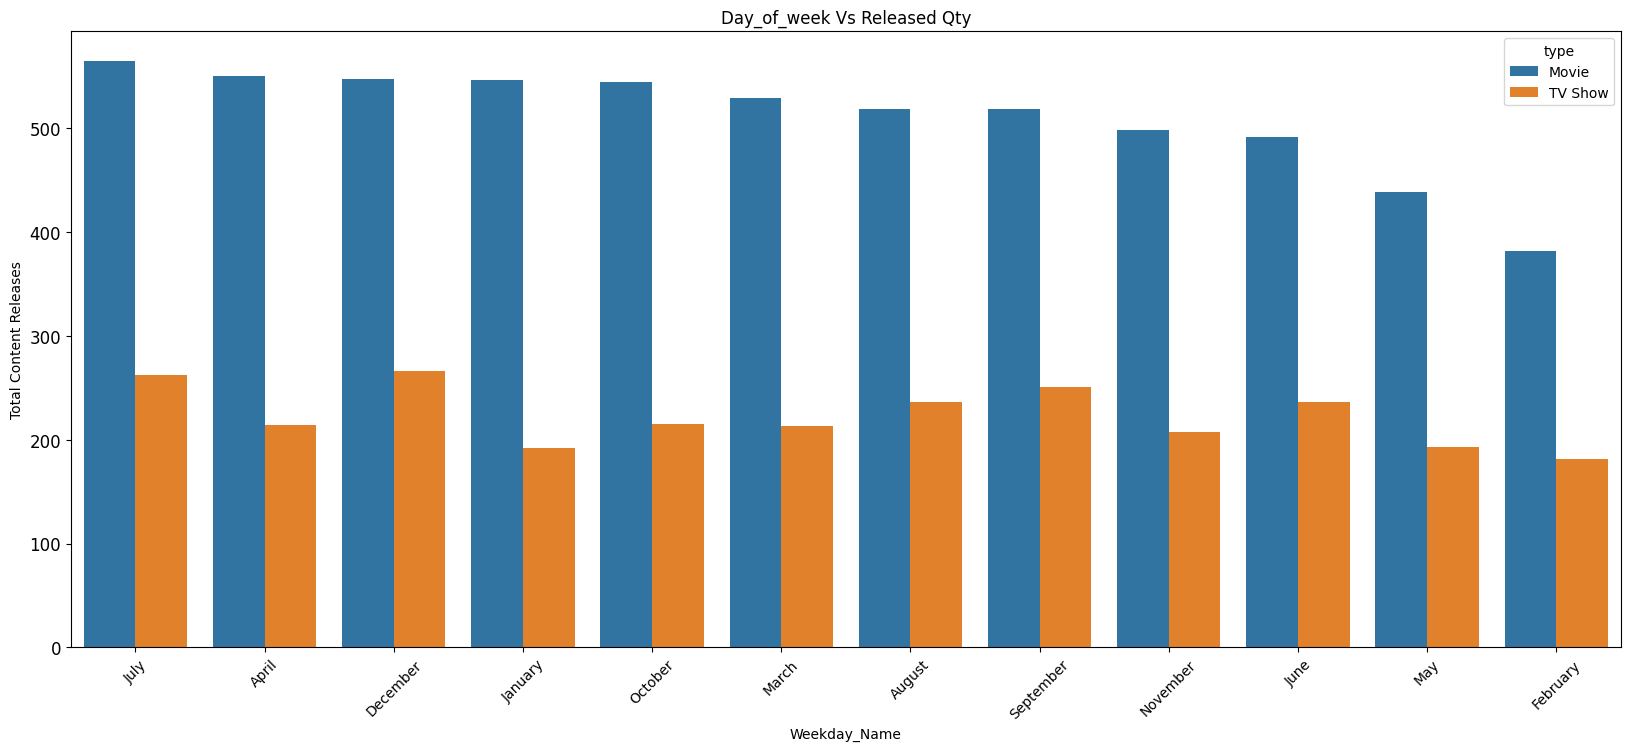

In [182]:
plt.figure(figsize = (20,8))
sns.barplot(data =month ,x ="date_added",y= "title", hue="type" )
plt.title("Month Vs Released Qty",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Month_Name",fontsize = 10)
plt.ylabel("Total Content Releases",fontsize = 10)
plt.show()

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data= data["date_added"].dt.week.reset_index(), x="date_added")
plt.show()

In [ ]:
data2.explode("director").groupby("director")["title"].count().sort_values(ascending=False)